In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

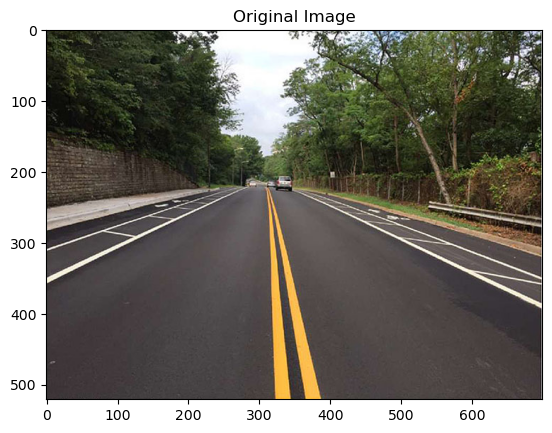

In [2]:
#loading the image and dispalying it
image = Image.open('road2.jpg')
image = image.convert('RGB')
plt.imshow(image)
plt.title("Original Image")
plt.show()

In [3]:
#converting the image into a np.array 
image_resized = image.resize((image.width // 3, image.height // 3))  # Reduce size by a factor of 4
image_bgr = cv2.cvtColor(np.array(image_resized), cv2.COLOR_RGB2BGR)
sharpening_kernel = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])
sharpened_image_bgr = cv2.filter2D(image_bgr, -1, sharpening_kernel)
sharpened_image_rgb = cv2.cvtColor(sharpened_image_bgr, cv2.COLOR_BGR2RGB)
image_np = np.array(sharpened_image_rgb)
image_np.shape

(173, 233, 3)

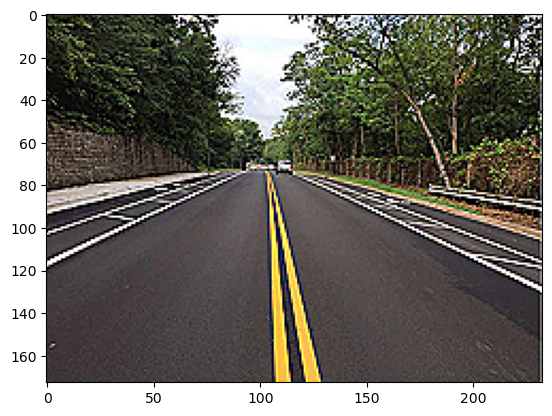

In [4]:
plt.imshow(image_np)


In [5]:
#reshaping for further use
pixels = image_np.reshape(-1,3)
pixels.shape

(40309, 3)

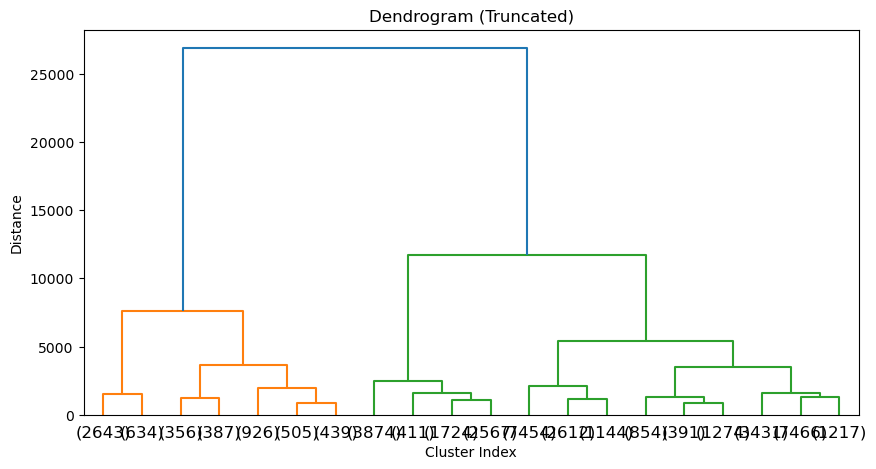

In [6]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
linkage_matrix = linkage(pixels, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, truncate_mode='lastp', p=20)
plt.title("Dendrogram (Truncated)")
plt.xlabel("Cluster Index")
plt.ylabel("Distance")
plt.show()

In [7]:
# Define the number of clusters
num_clusters = 6  # Adjust based on the image complexity

# Assign each pixel to a cluster
labels = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

# Reshape the labels to the original image shape
clustered_image = labels.reshape(image_np.shape[0], image_np.shape[1])


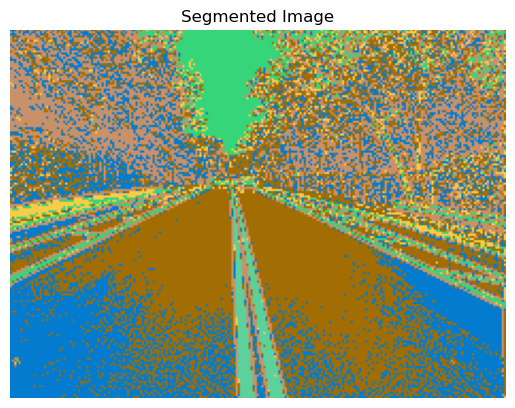

In [8]:
# Map each cluster to a random color
segmented_image = np.zeros_like(image_np)
for cluster in range(1, num_clusters + 1):
    segmented_image[clustered_image == cluster] = np.random.randint(0, 255, 3)

# Display the segmented image
plt.imshow(segmented_image)
plt.title("Segmented Image")
plt.axis('off')
plt.show()


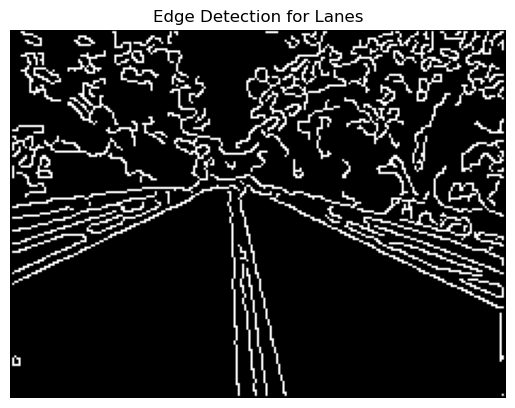

In [16]:
from skimage.feature import canny
from skimage.color import rgb2gray

# Convert segmented image to grayscale
gray_segmented = rgb2gray(segmented_image)

# Apply edge detection
edges = canny(gray_segmented, sigma=1.4)

# Display edges
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection for Lanes")
plt.axis('off')
plt.show()


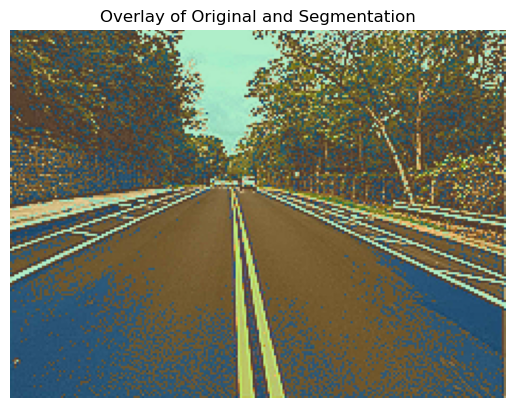

In [17]:
overlay = cv2.addWeighted(image_np, 0.6, segmented_image, 0.4, 0)
plt.imshow(overlay)
plt.title("Overlay of Original and Segmentation")
plt.axis('off')
plt.show()
